In [94]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Regular Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Imports
import string, re, nltk, spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# Modelling and Scoring Imports
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
import xgboost as xgb

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adamgrant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/adamgrant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Data from https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classificationtd-idf 
<br> Influenced by: https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

In [95]:
df = pd.read_csv('ecommerceDataset.csv')

## Data Exploration 

In [96]:
df.head()

,Category,Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [97]:
df.describe()

,Category,Description
count,50425,50424
unique,4,27802
top,Household,Think & Grow Rich About the Author NAPOLEON HI...
freq,19313,30


In [98]:
df['Category'].value_counts()

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: Category, dtype: int64

In [99]:
# Look for nulls
df.isnull().sum()

Category       0
Description    1
dtype: int64

## Data Cleaning

In [100]:
df.dropna(axis=0, inplace=True)

In [101]:
df.drop_duplicates(inplace=True)

In [102]:
df.describe()

,Category,Description
count,27802,27802
unique,4,27802
top,Household,Paper Plane Design Framed Wall Hanging Motivat...
freq,10564,1


## Cleaned Data Exploration

In [103]:
df['Category'].value_counts()

Household                 10564
Books                      6256
Clothing & Accessories     5674
Electronics                5308
Name: Category, dtype: int64

In [104]:
df.head()

,Category,Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [105]:
df['length'] = df['Description'].apply(len)

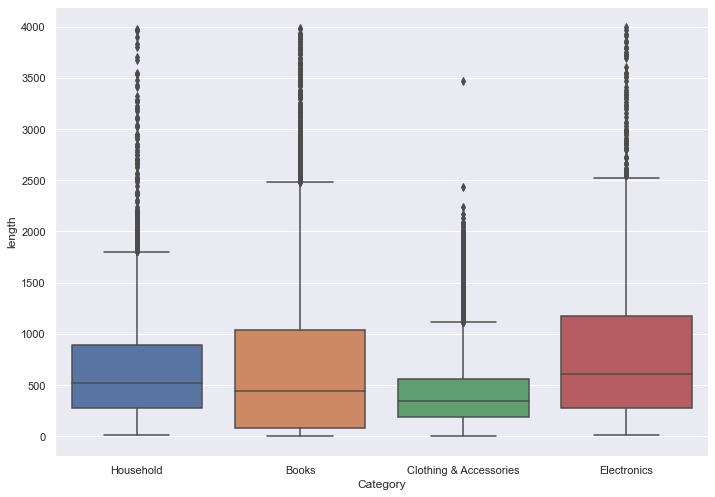

In [106]:
sns.boxplot(data=df[df['length']<4000], x='Category', y='length')
plt.show()

In [107]:
df.groupby('Category')['length'].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Books,6256.0,879.999840,1634.244888,4.0,79.0,472.0,1070.25,32493.0
Clothing & Accessories,5674.0,446.900775,384.919072,4.0,191.0,344.5,559.00,3474.0
Electronics,5308.0,825.012811,782.660129,9.0,275.0,616.5,1199.25,12473.0
Household,10564.0,661.725861,580.744105,8.0,277.0,518.0,893.00,10168.0


# Base Model Preprocessing

In [108]:
df["Category"] = df["Category"].astype('category')
df['Cat'] = df['Category'].cat.codes
X = df['Description']
y = df['Cat']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state= 42)

In [109]:
# TF-IDF Vectorization
TfidfVec = TfidfVectorizer(analyzer='word', stop_words='english')
X_train_t = TfidfVec.fit_transform(X_train)


# Count Vectorisation 
cntVec = CountVectorizer(analyzer='word', stop_words='english')
X_train_c = cntVec.fit_transform(X_train)


In [110]:
# Classifiers
names = [
    "Logistic Regression",
    "KNN Classifier",
    "Decision Tree",
    "Linear SVM",
    "Random Forest",
    "SGD Classifier",
    "Ridge Classifier",
    "XGBoost",
]

models = [
    LogisticRegression(max_iter = 1000),
    KNeighborsClassifier(n_neighbors = 50),
    DecisionTreeClassifier(),
    svm.SVC(kernel = 'linear'),
    RandomForestClassifier(n_estimators = 100),
    SGDClassifier(loss = 'hinge'),
    RidgeClassifier(),
    xgb.XGBClassifier(),
]

## Base Model Scoring

In [111]:
res = pd.DataFrame(columns = ['Method', 'Log Reg', 'KNN','Decision Tree', 'Linear SVM', 'Rand Forrest', 'SGD', 'Ridge', 'XGBoost'])  
l = []

#TDIDF Validation 
i = 0
for model in models:
    model_n = names[i]
    scores = cross_val_score(models[i], X_train_t, y_train, cv=5, scoring='f1_weighted')
    l.append(scores.mean())
    i = i + 1
res = res.append({'Method': 'TFIDF', 'Log Reg':l[0], 'KNN':l[1],'Decision Tree':l[2], 'Linear SVM':l[3], 'Rand Forrest':l[4], 'SGD':l[5],
                'Ridge':l[6], 'XGBoost':l[7]},
        ignore_index = True)
res

,Method,Log Reg,KNN,Decision Tree,Linear SVM,Rand Forrest,SGD,Ridge,XGBoost
0,TFIDF,0.946896,0.927469,0.869427,0.952105,0.926994,0.952676,0.953639,0.929389


In [112]:
#CountVec Cross Val
i = 0
l = []

for model in models:
    model_n = names[i]
    scores = cross_val_score(models[i], X_train_c, y_train, cv=5, scoring='f1_weighted')
    l.append(scores.mean())
    i = i + 1

res = res.append({'Method': 'Count Vec', 'Log Reg':l[0], 'KNN':l[1],'Decision Tree':l[2], 'Linear SVM':l[3], 'Rand Forrest':l[4], 'SGD':l[5],
                'Ridge':l[6], 'XGBoost':l[7]},
        ignore_index = True)
res

,Method,Log Reg,KNN,Decision Tree,Linear SVM,Rand Forrest,SGD,Ridge,XGBoost
0,TFIDF,0.946896,0.927469,0.869427,0.952105,0.926994,0.952676,0.953639,0.929389
1,Count Vec,0.94149,0.479646,0.872031,0.928849,0.925481,0.93773,0.869433,0.930051


# Further Text Preprocessing

In [113]:
# PreProcessing Functions 
# Code for these functions heavily influenced by Sugata Ghosh 
# https://www.kaggle.com/sugataghosh

# Stopwords
stops = stopwords.words("english") # stopwords
addstops = ["among", "onto", "shall", "thrice", "thus", "twice", "unto", "us", "would"] # additional stopwords
allstops = stops + addstops

# Function to remove stopwords from a list of texts
def remove_stopwords(text):
    return " ".join([word for word in word_tokenize(text) if word not in allstops])

# Lemmatization
spacy_lemmatizer = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])

def text_lemmatizer(text):
    text_spacy = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
    return text_spacy

In [114]:
#Processing 
df['Description'] = df['Description'].apply(str.lower)
df['Description'] = df['Description'].apply(remove_stopwords)
df['Description'] = df['Description'].apply(text_lemmatizer)

In [115]:
# Reassign and Split
X = df['Description']
y = df['Cat']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state= 42)

In [116]:
# TF-IDF Vectorization
TfidfVec = TfidfVectorizer(analyzer='word', stop_words='english')
X_train_tp = TfidfVec.fit_transform(X_train)

# Count Vectorisation 
cntVec = CountVectorizer(analyzer='word', stop_words='english')
X_train_cp = cntVec.fit_transform(X_train)

## Preprocessed Text Scoring

In [117]:
l = []

#TDIDF Validation Scoring  
i = 0
for model in models:
    model_n = names[i]
    scores = cross_val_score(models[i], X_train_tp, y_train, cv=5, scoring='f1_weighted')
    l.append(scores.mean())
    i = i + 1
    
res = res.append({'Method': 'TFIDF Pre-Processed', 'Log Reg':l[0], 'KNN':l[1],'Decision Tree':l[2], 'Linear SVM':l[3], 'Rand Forrest':l[4], 'SGD':l[5],
                'Ridge':l[6], 'XGBoost':l[7]},
        ignore_index = True)
res

,Method,Log Reg,KNN,Decision Tree,Linear SVM,Rand Forrest,SGD,Ridge,XGBoost
0,TFIDF,0.946896,0.927469,0.869427,0.952105,0.926994,0.952676,0.953639,0.929389
1,Count Vec,0.94149,0.479646,0.872031,0.928849,0.925481,0.93773,0.869433,0.930051
2,TFIDF Pre-Processed,0.947128,0.927569,0.869719,0.952243,0.925794,0.952876,0.953056,0.93109


In [118]:
#Count Vec Cross Val
i = 0
l = []
for model in models:
    model_n = names[i]
    scores = cross_val_score(models[i], X_train_cp, y_train, cv=5, scoring='f1_weighted')
    l.append(scores.mean())
    i = i + 1

res = res.append({'Method': 'Count Vec - Pre-Processed', 'Log Reg':l[0], 'KNN':l[1],'Decision Tree':l[2], 'Linear SVM':l[3], 'Rand Forrest':l[4], 'SGD':l[5],
                'Ridge':l[6], 'XGBoost':l[7]},
        ignore_index = True)
res

,Method,Log Reg,KNN,Decision Tree,Linear SVM,Rand Forrest,SGD,Ridge,XGBoost
0,TFIDF,0.946896,0.927469,0.869427,0.952105,0.926994,0.952676,0.953639,0.929389
1,Count Vec,0.94149,0.479646,0.872031,0.928849,0.925481,0.93773,0.869433,0.930051
2,TFIDF Pre-Processed,0.947128,0.927569,0.869719,0.952243,0.925794,0.952876,0.953056,0.93109
3,Count Vec - Pre-Processed,0.941393,0.529036,0.876084,0.92879,0.926261,0.938262,0.867789,0.928917


## Tuning the best performing models

In [119]:
### Best Performing Models 
# Ridge TDF IDF - Unprocessed
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]} 
  
grid = GridSearchCV(RidgeClassifier(), param_grid, refit = True, scoring = 'f1_weighted',verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_t, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .........................alpha=0.1;, score=0.948 total time=   0.7s
[CV 2/5] END .........................alpha=0.1;, score=0.951 total time=   0.7s
[CV 3/5] END .........................alpha=0.1;, score=0.951 total time=   0.7s
[CV 4/5] END .........................alpha=0.1;, score=0.952 total time=   0.7s
[CV 5/5] END .........................alpha=0.1;, score=0.951 total time=   0.7s
[CV 1/5] END .........................alpha=0.2;, score=0.950 total time=   0.5s
[CV 2/5] END .........................alpha=0.2;, score=0.955 total time=   0.5s
[CV 3/5] END .........................alpha=0.2;, score=0.954 total time=   0.5s
[CV 4/5] END .........................alpha=0.2;, score=0.953 total time=   0.5s
[CV 5/5] END .........................alpha=0.2;, score=0.951 total time=   0.5s
[CV 1/5] END .........................alpha=0.3;, score=0.950 total time=   0.4s
[CV 2/5] END .........................alpha=0.3;

GridSearchCV(estimator=RidgeClassifier(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]},
             scoring='f1_weighted', verbose=3)

In [120]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'alpha': 0.7}
RidgeClassifier(alpha=0.7)


In [121]:
# SGD TFIDF Unprocessed 

# defining parameter range
param_grid = {"loss" : ["hinge", "log", "squared_hinge", "modified_huber"], 
              "alpha" : [0.0001, 0.001, 0.01, 0.1],
               "penalty" : ["l2", "l1", "none"]} 
  
grid = GridSearchCV(SGDClassifier(), param_grid, refit = True, scoring = 'f1_weighted',verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_t, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END alpha=0.0001, loss=hinge, penalty=l2;, score=0.951 total time=   0.1s
[CV 2/5] END alpha=0.0001, loss=hinge, penalty=l2;, score=0.957 total time=   0.1s
[CV 3/5] END alpha=0.0001, loss=hinge, penalty=l2;, score=0.954 total time=   0.1s
[CV 4/5] END alpha=0.0001, loss=hinge, penalty=l2;, score=0.950 total time=   0.1s
[CV 5/5] END alpha=0.0001, loss=hinge, penalty=l2;, score=0.951 total time=   0.1s
[CV 1/5] END alpha=0.0001, loss=hinge, penalty=l1;, score=0.936 total time=   0.1s
[CV 2/5] END alpha=0.0001, loss=hinge, penalty=l1;, score=0.945 total time=   0.1s
[CV 3/5] END alpha=0.0001, loss=hinge, penalty=l1;, score=0.939 total time=   0.1s
[CV 4/5] END alpha=0.0001, loss=hinge, penalty=l1;, score=0.937 total time=   0.2s
[CV 5/5] END alpha=0.0001, loss=hinge, penalty=l1;, score=0.937 total time=   0.1s
[CV 1/5] END alpha=0.0001, loss=hinge, penalty=none;, score=0.948 total time=   0.1s
[CV 2/5] END alpha=0.00

/Users/adamgrant/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.0001, loss=squared_hinge, penalty=l1;, score=0.910 total time=   8.1s


/Users/adamgrant/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.0001, loss=squared_hinge, penalty=l1;, score=0.907 total time=   8.1s
[CV 3/5] END alpha=0.0001, loss=squared_hinge, penalty=l1;, score=0.914 total time=   2.3s
[CV 4/5] END alpha=0.0001, loss=squared_hinge, penalty=l1;, score=0.916 total time=   3.1s
[CV 5/5] END alpha=0.0001, loss=squared_hinge, penalty=l1;, score=0.921 total time=   3.1s


/Users/adamgrant/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.0001, loss=squared_hinge, penalty=none;, score=0.898 total time=   2.7s
[CV 2/5] END alpha=0.0001, loss=squared_hinge, penalty=none;, score=0.924 total time=   1.1s
[CV 3/5] END alpha=0.0001, loss=squared_hinge, penalty=none;, score=0.913 total time=   0.3s
[CV 4/5] END alpha=0.0001, loss=squared_hinge, penalty=none;, score=0.904 total time=   1.4s


/Users/adamgrant/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.0001, loss=squared_hinge, penalty=none;, score=0.897 total time=   1.9s
[CV 1/5] END alpha=0.0001, loss=modified_huber, penalty=l2;, score=0.952 total time=   0.1s
[CV 2/5] END alpha=0.0001, loss=modified_huber, penalty=l2;, score=0.958 total time=   0.1s
[CV 3/5] END alpha=0.0001, loss=modified_huber, penalty=l2;, score=0.956 total time=   0.1s
[CV 4/5] END alpha=0.0001, loss=modified_huber, penalty=l2;, score=0.952 total time=   0.1s
[CV 5/5] END alpha=0.0001, loss=modified_huber, penalty=l2;, score=0.951 total time=   0.1s
[CV 1/5] END alpha=0.0001, loss=modified_huber, penalty=l1;, score=0.940 total time=   0.2s
[CV 2/5] END alpha=0.0001, loss=modified_huber, penalty=l1;, score=0.948 total time=   0.2s
[CV 3/5] END alpha=0.0001, loss=modified_huber, penalty=l1;, score=0.939 total time=   0.2s
[CV 4/5] END alpha=0.0001, loss=modified_huber, penalty=l1;, score=0.937 total time=   0.2s
[CV 5/5] END alpha=0.0001, loss=modified_huber, penalty=l1;, score=0.937 total 

GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'loss': ['hinge', 'log', 'squared_hinge',
                                  'modified_huber'],
                         'penalty': ['l2', 'l1', 'none']},
             scoring='f1_weighted', verbose=3)

In [122]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'alpha': 0.0001, 'loss': 'modified_huber', 'penalty': 'l2'}
SGDClassifier(loss='modified_huber')


In [123]:
# SGD Tuned
scores = cross_val_score( SGDClassifier(loss = 'modified_huber',penalty='l2', alpha = 0.0001), X_train_t, y_train, cv=10, scoring='f1_weighted')
print(scores.mean())

0.953936504964909


In [124]:
# Ridge Tuned
scores = cross_val_score( RidgeClassifier(alpha = 0.7), X_train_t, y_train, cv=10, scoring='f1_weighted')
print(scores.mean())

0.9552794511671692


## Final Comparison on Test Data

In [125]:
df = pd.read_csv('ecommerceDataset.csv')
df.dropna(axis=0, inplace=True)
df.drop_duplicates(inplace=True)

# Reassign and Split
X = df['Description']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state= 42)

X_train_t = TfidfVec.fit_transform(X_train)
X_test_t = TfidfVec.transform(X_test)

In [126]:
# Final Test on Ridge
ridge =  RidgeClassifier(alpha = 0.7)
ridge.fit(X_train_t, y_train)
#predicted y

predictions = ridge.predict(X_test_t)
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

                        precision    recall  f1-score   support

                 Books       0.97      0.94      0.96      1601
Clothing & Accessories       0.97      0.98      0.98      1385
           Electronics       0.95      0.95      0.95      1308
             Household       0.95      0.97      0.96      2657

              accuracy                           0.96      6951
             macro avg       0.96      0.96      0.96      6951
          weighted avg       0.96      0.96      0.96      6951

[[1512   11   21   57]
 [   4 1357    6   18]
 [  15    4 1240   49]
 [  28   23   32 2574]]


In [127]:
# Final Test on Test Data SGD 
SGD = SGDClassifier(loss = 'modified_huber',penalty='l2', alpha = 0.0001)
SGD.fit(X_train_t, y_train)
#predicted y

predictions = SGD.predict(X_test_t)
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

                        precision    recall  f1-score   support

                 Books       0.97      0.94      0.96      1601
Clothing & Accessories       0.97      0.98      0.97      1385
           Electronics       0.95      0.94      0.95      1308
             Household       0.95      0.97      0.96      2657

              accuracy                           0.96      6951
             macro avg       0.96      0.96      0.96      6951
          weighted avg       0.96      0.96      0.96      6951

[[1512   11   24   54]
 [   6 1357    8   14]
 [  17    6 1231   54]
 [  30   28   34 2565]]


## The Best model found was a ridge classification model with an alpha of .7